---
title: "Case Study 2: Bellabeat"

author: "Nancy Chauhan"

date: "November 16, 2021"

output: 
  pdf_document: default
  
  html_document: default
---

## Library

In [1]:
library(readr)
library(tinytex)
library(janitor)
library(dplyr)
library(skimr)
library(tibble)
library(ggplot2)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Import file

In [2]:
activity <- read.csv("../input/fitbit-fitness-bellabeat-high-tech-company/dailyActivity_merged1.csv")
sleep <- read.csv("../input/fitbit-fitness-bellabeat-high-tech-company/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit-fitness-bellabeat-high-tech-company/weightLogInfo_merged.csv")

## Column name

In [3]:
colnames(activity)
colnames(sleep)
colnames(weight)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

## Column compare

In [4]:
compare_df_cols(activity,sleep,weight)

column_name,activity,sleep,weight
<chr>,<chr>,<chr>,<chr>
ActivityDate,character,NA,NA
BMI,NA,NA,numeric
Calories,integer,NA,NA
Date,NA,NA,character
FairlyActiveMinutes,integer,NA,NA
Fat,NA,NA,integer
Id,numeric,numeric,numeric
IsManualReport,NA,NA,character
LightActiveDistance,numeric,NA,NA


## Rename

In [5]:
activity <- activity %>%
  rename(Date = ActivityDate)
sleep <- sleep %>% 
  rename(Date = SleepDay)

##  Change charater

In [6]:
activity$Date <- as.Date(activity$Date, "%m/%d/%Y")
weight$Date <- as.Date(weight$Date, "%m/%d/%Y")
sleep$Date <- as.Date(sleep$Date, "%m/%d/%Y")

weight$IsManualReport <- as.logical(weight$IsManualReport)


## Delete column

In [7]:
activity <- activity %>% 
  select(-c(LoggedActivitiesDistance,SedentaryActiveDistance,TrackerDistance ))
weight <- weight %>% 
  select(-c(LogId ,Fat ))

## Correcting column name

In [8]:
activity_1 <- clean_names(activity)
weight_1 <- clean_names(weight)
sleep_1 <- clean_names(sleep)

## Any missing (NA) values in the dataframe

In [9]:
sum(is.na(activity_1))
sum(is.na(weight_1))
sum(is.na(sleep_1))

[1] 0

[1] 0

[1] 0

## Merge{1}

In [10]:
activity_and_sleep <- merge(x=activity_1,y=sleep_1, by=c("date","id"))

## New column

In [11]:
activity_and_sleep$total_minutes_not_asleep <- c((activity_and_sleep$total_time_in_bed)-(activity_and_sleep$total_minutes_asleep))


## Merge{2}

In [12]:
activity_and_weight <- merge(x=activity_1, y=weight_1, by=c("date","id"))

## Summary

In [13]:
summary(activity_and_sleep)
print("weight_kg")
summary(activity_and_weight$weight_kg)
print("weight_pound")
summary(activity_and_weight$weight_pounds)
print("bmi")
summary(activity_and_weight$bmi)
print("is_manual_report")
summary(activity_and_weight$is_manual_report)

      date                  id             total_steps    total_distance  
 Min.   :2016-04-12   Min.   :1.504e+09   Min.   :   17   Min.   : 0.010  
 1st Qu.:2016-04-19   1st Qu.:3.977e+09   1st Qu.: 5206   1st Qu.: 3.600  
 Median :2016-04-27   Median :4.703e+09   Median : 8925   Median : 6.290  
 Mean   :2016-04-26   Mean   :5.001e+09   Mean   : 8541   Mean   : 6.039  
 3rd Qu.:2016-05-04   3rd Qu.:6.962e+09   3rd Qu.:11393   3rd Qu.: 8.030  
 Max.   :2016-05-12   Max.   :8.792e+09   Max.   :22770   Max.   :17.540  
 very_active_distance moderately_active_distance light_active_distance
 Min.   : 0.00        Min.   :0.0000             Min.   :0.010        
 1st Qu.: 0.00        1st Qu.:0.0000             1st Qu.:2.540        
 Median : 0.57        Median :0.4200             Median :3.680        
 Mean   : 1.45        Mean   :0.7502             Mean   :3.807        
 3rd Qu.: 2.37        3rd Qu.:1.0400             3rd Qu.:4.930        
 Max.   :12.54        Max.   :6.4800             

[1] "weight_kg"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.60   61.40   62.50   72.04   85.05  133.50 

[1] "weight_pound"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  116.0   135.4   137.8   158.8   187.5   294.3 

[1] "bmi"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.45   23.96   24.39   25.19   25.56   47.54 

[1] "is_manual_report"


   Mode   FALSE    TRUE 
logical      26      41 

## Skim a data frame

In [14]:
skim(activity_and_sleep)
skim(activity_and_weight)

── Data Summary ────────────────────────
                           Values            
Name                       activity_and_sleep
Number of rows             413               
Number of columns          16                
_______________________                      
Column type frequency:                       
  Date                     1                 
  numeric                  15                
________________________                     
Group variables            None              

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 date                  0             1 2016-04-12 2016-05-12 2016-04-27
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable              n_missing complete_rate    mean      sd      p0
 1 id                                 0             1 5.00e+9 2.06e+9 1.50e+9
 2 total_st

## New Table

In [15]:
head(activity_and_sleep)

,date,id,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_minutes_not_asleep
,<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2016-04-12,1503960366,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346,19
2,2016-04-12,1927972279,678,0.47,0.00,0.00,0.47,0,0,55,734,2220,3,750,775,25
3,2016-04-12,2026352035,4414,2.74,0.19,0.35,2.20,3,8,181,706,1459,1,503,546,43
4,2016-04-12,3977333714,8856,5.98,3.06,0.91,2.01,44,19,131,777,1450,1,274,469,195
5,2016-04-12,4020332650,8539,6.12,0.15,0.24,5.68,4,15,331,712,3654,1,501,541,40
6,2016-04-12,4445114986,3276,2.20,0.00,0.00,2.20,0,0,196,787,2113,2,429,457,28


In [16]:
head(activity_and_weight)

,date,id,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weight_kg,weight_pounds,bmi,is_manual_report
,<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
1,2016-04-12,6962181067,10199,6.74,3.40,0.83,2.51,50,14,189,796,1994,62.5,137.7889,24.39,TRUE
2,2016-04-12,8877689391,23186,20.40,12.22,0.34,7.82,85,7,312,1036,3921,85.8,189.1566,25.68,FALSE
3,2016-04-13,1927972279,356,0.25,0.00,0.00,0.25,0,0,32,986,2151,133.5,294.3171,47.54,FALSE
4,2016-04-13,6962181067,5652,3.74,0.57,1.21,1.96,8,24,142,548,1718,62.1,136.9071,24.24,TRUE
5,2016-04-13,8877689391,15337,9.58,3.55,0.38,5.64,108,18,216,1098,3566,84.9,187.1725,25.41,FALSE
6,2016-04-14,6962181067,1551,1.03,0.00,0.00,1.03,0,0,86,862,1466,61.7,136.0252,24.10,TRUE


 # Visualisation

## Some data points show that consumers spent a lot of time in bed, but didn’t sleep


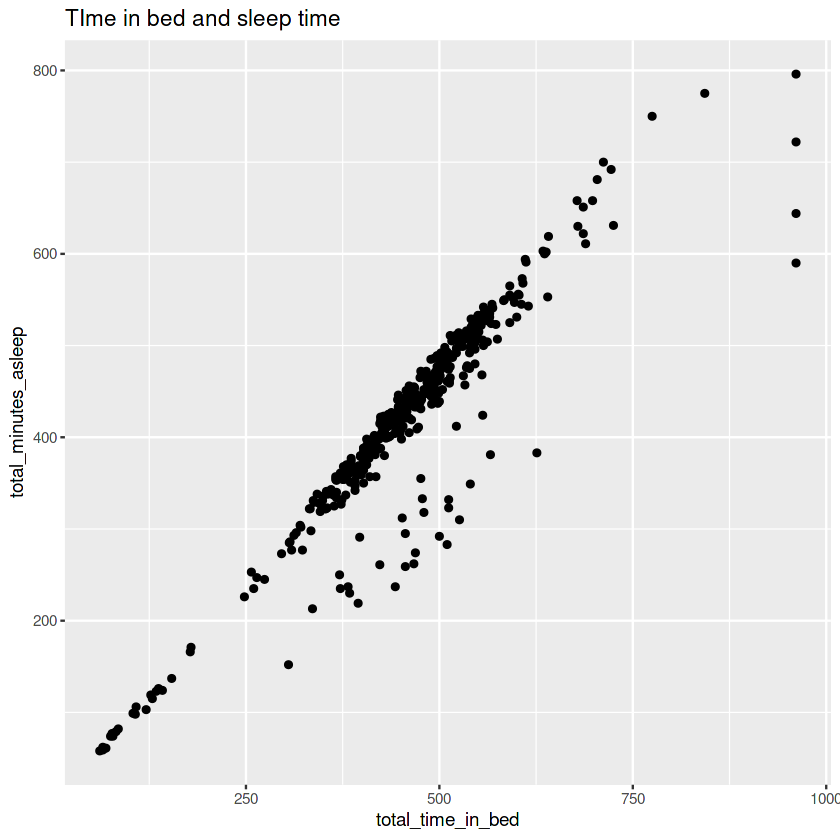

In [17]:
ggplot(data=activity_and_sleep,aes(x=total_time_in_bed,y=total_minutes_asleep ))+geom_point()+ labs(title="TIme in bed and sleep time") 

## Inactive time and time in bed are entirely different and have different effects.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



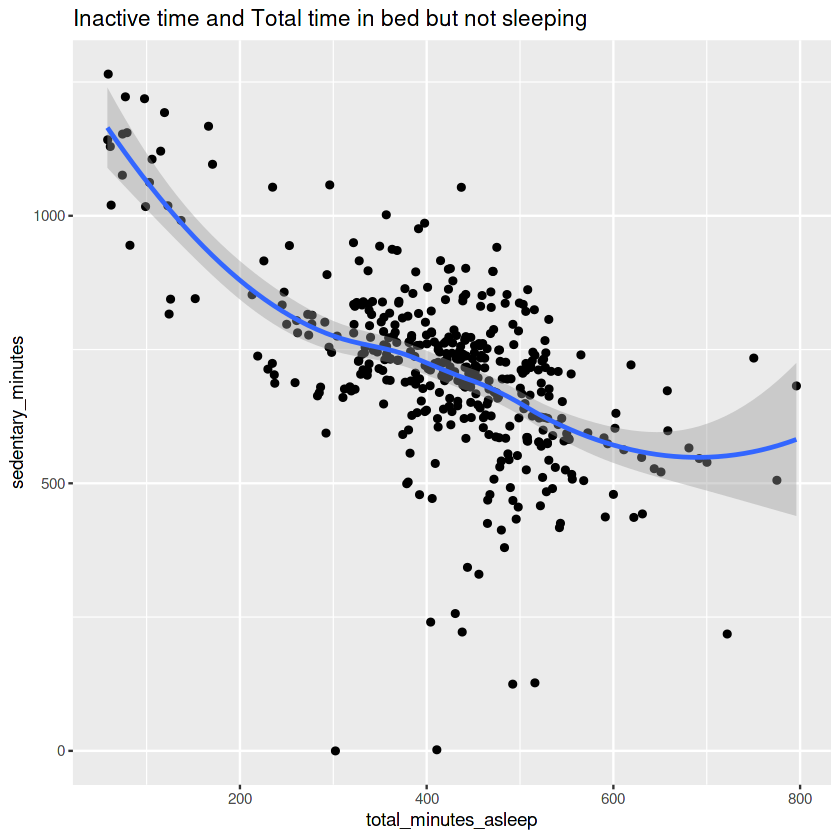

In [18]:
ggplot(activity_and_sleep,aes(x=total_minutes_asleep ,y=sedentary_minutes ))+geom_jitter()+geom_smooth()+
  labs(title="Inactive time and Total time in bed but not sleeping") 

## BMI(weight) is independent of total step(activity).

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



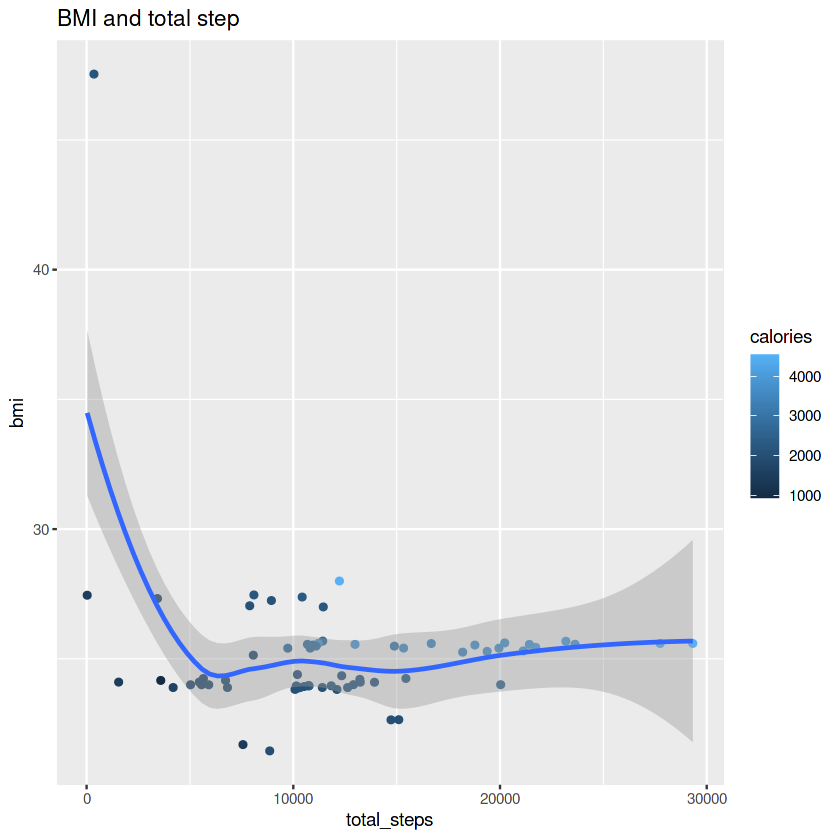

In [19]:
ggplot(activity_and_weight,aes(y=bmi ,x=total_steps ,color=calories))+geom_jitter()+geom_smooth()+
    labs(title="BMI and total step ") 

## steps directly proprtional to calories

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



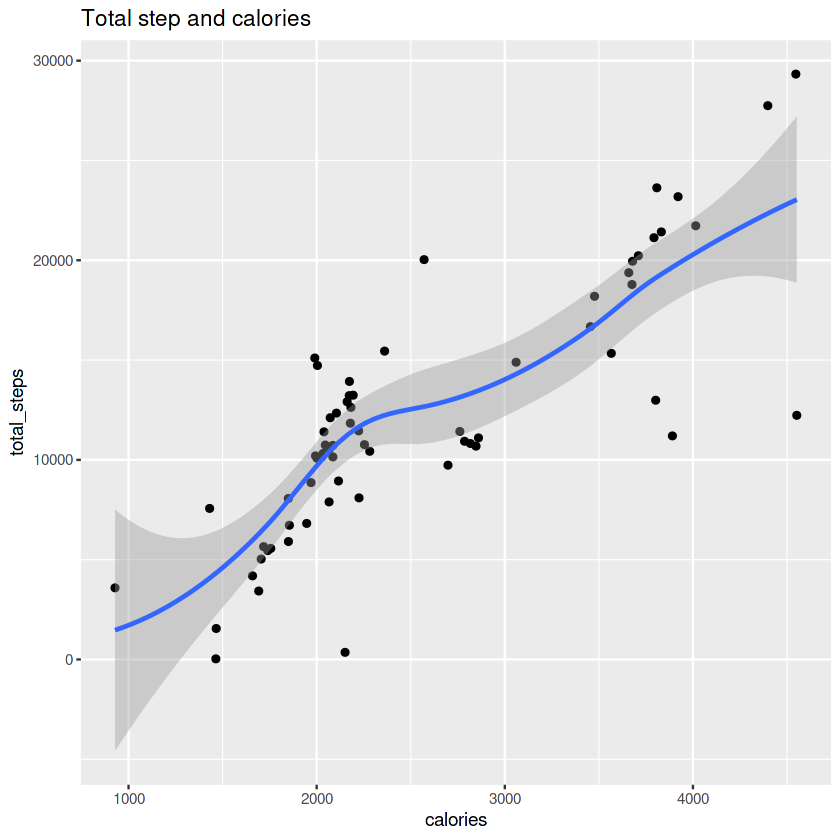

In [20]:
ggplot(activity_and_weight,aes(x=calories,y=total_steps))+geom_point()+geom_smooth()+
    labs(title="Total step and calories") 

## Sedentary time is not necessarily related to calories burned & weight.

`geom_smooth()` using formula 'y ~ x'



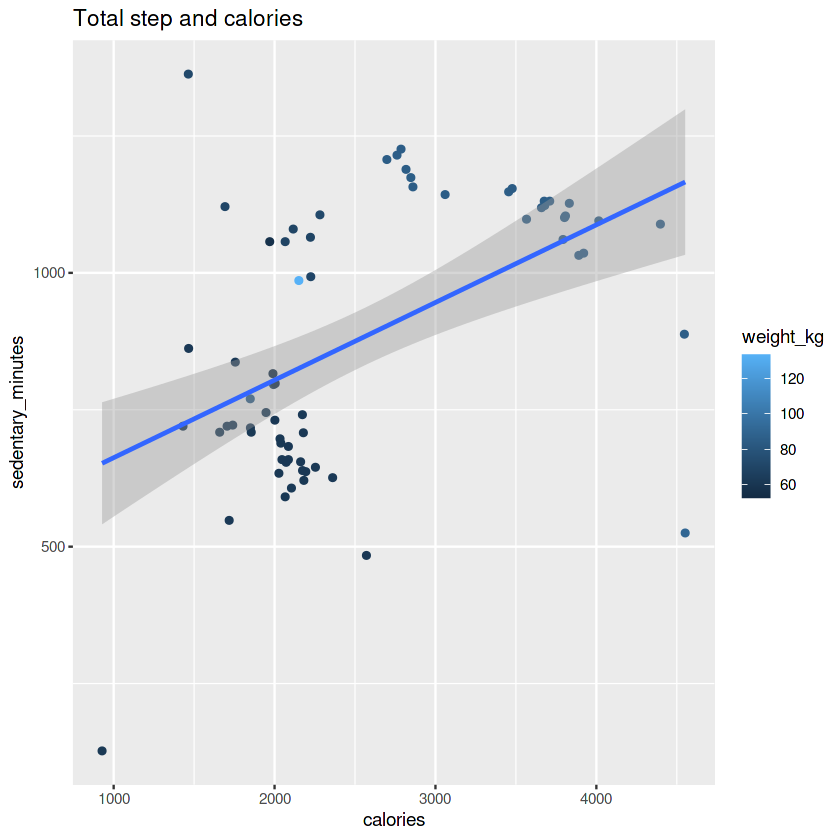

In [21]:
ggplot(activity_and_weight,aes(y=sedentary_minutes ,x=calories,color=weight_kg ))+geom_point()+geom_smooth(method = lm)+
  labs(title="Total step and calories") 

## Light Activity time and weight 

`geom_smooth()` using formula 'y ~ x'



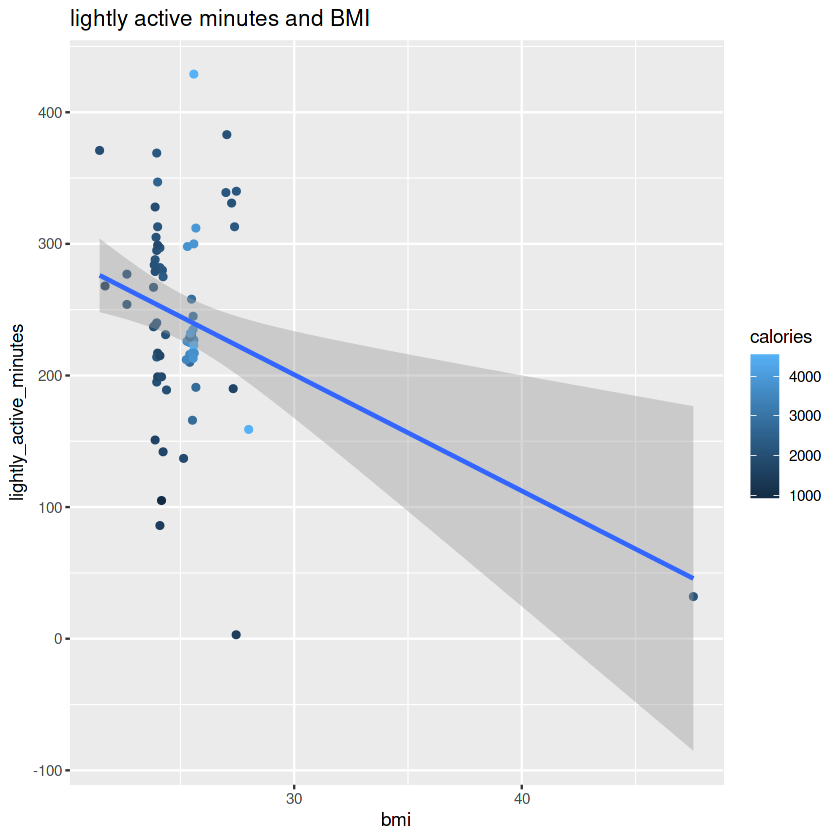

In [22]:
ggplot(activity_and_weight,aes(y=lightly_active_minutes, x=bmi ,color=calories))+geom_point()+geom_smooth(method = lm)+
    labs(title="lightly active minutes and BMI") 

## Insights and Recommendations


After analysing the data,following are the conclusions.

1.Sleep: Sleep reminder, soothing music, or podcast to relax. (because we need more sleep data), marketing strategy - active people sleep better

2. Calories: Healthy Recipe for diet, a reminder to eat(eating disorder in check) and maintaining hydration level(water   reminder), suggest nearby restaurant(too busy or can't cook).

3. Educate : Blogs(short) or notifications to educate about healthy eating habits, exercise, and sleep.

4. Weight: monthly or bi-monthly reminder weight since BMI and activity are independent of weight motivational campaign to emphasize to be fit not to be slim(or underweight), exercise video (link) to be provided with collaboration with other ap 